# Data analysis process

1. Discover
1. Cleanse
1. Analyze
1. Report

# This dataset - definitions

country_or_area

element_code

element

year: string that shows a 4 character year

unit

value

value_footnotes

category


In [2]:
import pandas as pd

In [3]:
# fixed stuff. Always use this
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.width = 0

# Discover
*Note: be sure that read_csv has the correct path to the file*

In [6]:
#all_crops = pd.read_csv("/data/agric/fao_data_crops_data.csv")

all_crops = pd.read_csv("/data/agric/fao_data_crops_data.csv", converters={'year': str})

In [7]:
all_crops.head(20)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007,Ha,49404.000,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006,Ha,49404.000,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005,Ha,49404.000,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004,Ha,49113.000,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003,Ha,48559.000,A,agave_fibres_nes
5,Americas +,31,Area Harvested,2002,Ha,48506.000,A,agave_fibres_nes
6,Americas +,31,Area Harvested,2001,Ha,47767.000,A,agave_fibres_nes
7,Americas +,31,Area Harvested,2000,Ha,48747.000,A,agave_fibres_nes
8,Americas +,31,Area Harvested,1999,Ha,46978.000,A,agave_fibres_nes
9,Americas +,31,Area Harvested,1998,Ha,48571.000,A,agave_fibres_nes


In [8]:
all_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255349 entries, 0 to 2255348
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   element_code     object 
 2   element          object 
 3   year             object 
 4   unit             object 
 5   value            float64
 6   value_footnotes  object 
 7   category         object 
dtypes: float64(1), object(7)
memory usage: 137.7+ MB


In [9]:
null_data = all_crops[all_crops.isnull().any(axis=1)]
print(null_data.count())
null_data.columns[null_data.isnull().any()]

country_or_area    479382
element_code       479382
element            478418
year               479382
unit               478418
value              478418
value_footnotes         0
category           479382
dtype: int64


Index(['element', 'unit', 'value', 'value_footnotes'], dtype='object')

# Cleanse

In [10]:
all_crops = all_crops.dropna(how='any',axis=0) 

In [11]:
null_data = all_crops[all_crops.isnull().any(axis=1)]
print(null_data.count())
null_data.columns[null_data.isnull().any()]

country_or_area    0
element_code       0
element            0
year               0
unit               0
value              0
value_footnotes    0
category           0
dtype: int64


Index([], dtype='object')

In [12]:
all_crops.describe()

,value
count,1775967.000
mean,1753548.218
std,21795706.783
min,0.000
25%,708.000
50%,14136.000
75%,107272.000
max,2351396424.000


In [13]:
for column in all_crops:
    print(all_crops[column].unique())

['Americas +' 'Asia +' 'Caribbean +' 'Central America +' 'Colombia' 'Cuba'
 'Ecuador' 'El Salvador' 'Guatemala' 'Low Income Food Deficit Countries +'
 'Mexico' 'Net Food Importing Developing Countries +' 'Nicaragua'
 'Philippines' 'Small Island Developing States +' 'South America +'
 'South-Eastern Asia +' 'World +' 'Afghanistan' 'Africa +' 'Algeria'
 'Argentina' 'Armenia' 'Australia' 'Australia and New Zealand +'
 'Azerbaijan' 'Bosnia and Herzegovina' 'Bulgaria' 'Burkina Faso'
 'Central Asia +' 'Chile' 'China' 'China, mainland' "Côte d'Ivoire"
 'Croatia' 'Cyprus' 'Eastern Asia +' 'Eastern Europe +' 'Europe +'
 'European Union +' 'France' 'Georgia' 'Greece' 'Hungary'
 'Iran, Islamic Republic of' 'Iraq' 'Israel' 'Italy' 'Jordan' 'Kazakhstan'
 'Kyrgyzstan' 'LandLocked developing countries +'
 'Least Developed Countries +' 'Lebanon' 'Libyan Arab Jamahiriya'
 'Moldova' 'Morocco' 'Nepal' 'Northern Africa +' 'Northern America +'
 'Occupied Palestinian Territory' 'Oceania +' 'Pakistan' 'Portu

In [14]:
for column in all_crops:
    print(all_crops[column].value_counts())

World +                                      27683
Asia +                                       25474
Americas +                                   25239
Africa +                                     23970
South America +                              22231
Eastern Asia +                               21761
Europe +                                     20962
Southern Europe +                            20586
Western Asia +                               20492
Central America +                            20163
Southern Asia +                              19881
Eastern Africa +                             19552
Oceania +                                    19317
Northern Africa +                            18800
Low Income Food Deficit Countries +          18189
South-Eastern Asia +                         18048
Eastern Europe +                             18001
Net Food Importing Developing Countries +    17813
Northern America +                           17625
LandLocked developing countries

41     615683
31     473111
51     443731
111    188064
154      9399
152      9399
436      9145
432      9145
438      9145
434      9145
Name: element_code, dtype: int64
Yield                                   615683
Area Harvested                          473111
Production Quantity                     443731
Seed                                    188064
Gross Production 1999-2001 (1000 I$)      9399
Net Production 1999-2001 (1000 I$)        9399
Grs per capita PIN (base 1999-2001)       9145
Gross PIN (base 1999-2001)                9145
Net per capita PIN (base 1999-2001)       9145
Net PIN (base 1999-2001)                  9145
Name: element, dtype: int64
2007    42097
2006    40707
1993    40059
2005    40032
1994    39979
1995    39868
1997    39748
1996    39688
2004    39684
2001    39627
2002    39602
2003    39436
1998    39406
1999    39398
2000    39312
1992    39179
1961    37405
1962    37392
1963    37220
1964    37132
1965    36893
1967    36842
1986    36840
1969   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A     974473
Fc    386744
F     264501
NR    150249
Name: value_footnotes, dtype: int64
cereals_total                   92974
roots_and_tubers_total          38912
oilcrops_primary                37981
oilcakes_equivalent             37693
cereals_rice_milled_eqv         37596
coarse_grain_total              36883
pulses_total                    35025
vegetables_melons_total         32459
fruit_excl_melons_total         31252
vegetables_fresh_nes            26199
citrus_fruit_total              23115
fruit_fresh_nes                 22526
fibre_crops_primary             21955
maize                           21263
potatoes                        20693
pulses_nes                      20010
treenuts_total                  19078
groundnuts_with_shell           18249
tomatoes                        17560
beans_dry                       17403
rice_paddy                      17082
sorghum                         16614
bananas                         16407
sweet_potatoes                  15724


In [16]:
world = all_crops[all_crops['country_or_area'].isin(['World +'])]

In [17]:
world.head(10)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
2256,World +,31,Area Harvested,2007,Ha,53204.000,A,agave_fibres_nes
2257,World +,31,Area Harvested,2006,Ha,53204.000,A,agave_fibres_nes
2258,World +,31,Area Harvested,2005,Ha,53204.000,A,agave_fibres_nes
2259,World +,31,Area Harvested,2004,Ha,52913.000,A,agave_fibres_nes
2260,World +,31,Area Harvested,2003,Ha,52359.000,A,agave_fibres_nes
2261,World +,31,Area Harvested,2002,Ha,52306.000,A,agave_fibres_nes
2262,World +,31,Area Harvested,2001,Ha,51567.000,A,agave_fibres_nes
2263,World +,31,Area Harvested,2000,Ha,52547.000,A,agave_fibres_nes
2264,World +,31,Area Harvested,1999,Ha,50778.000,A,agave_fibres_nes
2265,World +,31,Area Harvested,1998,Ha,52371.000,A,agave_fibres_nes


In [18]:
world.count()

country_or_area    27683
element_code       27683
element            27683
year               27683
unit               27683
value              27683
value_footnotes    27683
category           27683
dtype: int64

# Analyze

In [19]:
world_groups = world.groupby([world['year']])['value'].sum()

<AxesSubplot:xlabel='year'>

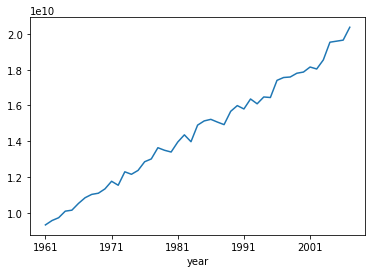

In [20]:
world_groups.plot(kind='line',legend=None, xlim=None, ylim=None)

country_or_area    705
element_code       705
element            705
year               705
unit               705
value              705
value_footnotes    705
category           705
dtype: int64


<AxesSubplot:xlabel='category'>

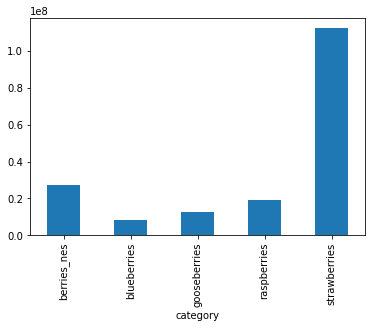

In [21]:
world_category = world[world['category'].isin([
    'strawberries', 
    'raspberries', 
    'gooseberries', 
    'berries_nes', 
    'blueberries'])
    ]
print(world_category.count())
world_category = world_category.groupby([world_category['category']])['value'].sum()
world_category.plot(kind='bar',legend=None, xlim=None, ylim=None)